In [1]:
"""
Visualization of single neuron dynamics for various models
"""
import numpy as np
import matplotlib.pyplot as plt
import neuron
import scipy as sp


# also define figure paramaters
plotparams = {'legend.fontsize': 'large',
    'figure.figsize': (8, 6),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'text.usetex': 'True',
    'xtick.major.size': 6.,
    'ytick.major.size': 6.
    }
plt.rcParams.update(plotparams)
#normalized guassian for constructing input signals
Gaussian_pulse= lambda x, mu, sig: np.exp(-np.power(x - mu, 2.) 
    / (2 * np.power(sig, 2.)))/(np.sqrt(2*np.pi)*sig)

Section 1: Yamada laser neuron dynamics under excitation

Demo of Yamada Neuron response to pulsed inputs


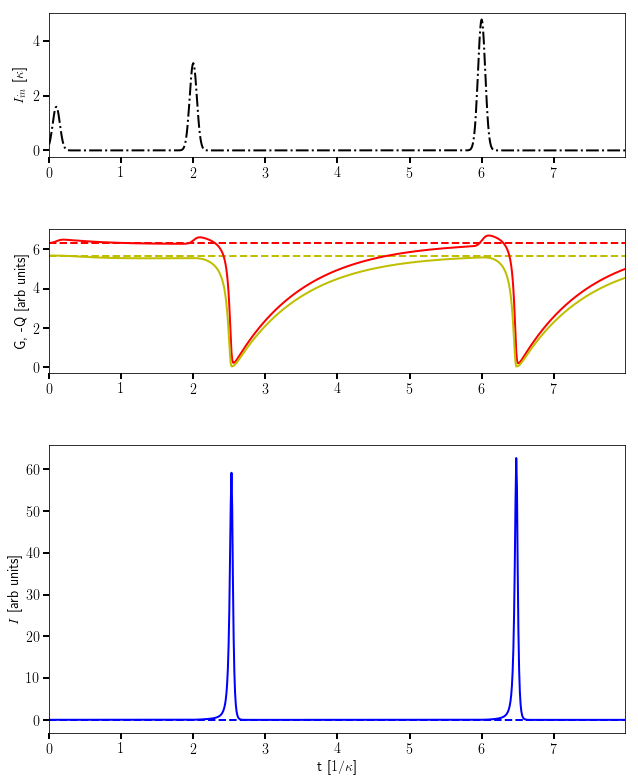

In [75]:
#Demo of spiking Yamada Neuron (version1)
#only spikes for inputs with pulse area >threshold

#Create Neuron, best to choose gamma=1 so kappa[gamma] and time[1/gamma]
Y1mpars={"a": 2, "A": 6.5, "B":-6., "gamma1": 1,
         "gamma2": 1, "kappa": 50, "beta": 5e-1 }
y1_steady_est=[Y1mpars['beta']/Y1mpars['kappa'],
               Y1mpars['A'],Y1mpars['B'] ]
Y1params={"model" : "Yamada_1", "y0": y1_steady_est,
    "dt": 1e-2, 'mpar': Y1mpars} #quick estimate of ss
# also this dt is probably the best can do, dont want kappa*dt any larger
Y1Neuronv1=neuron.Neuron(Y1params)
y1_steady=Y1Neuronv1.steady_state(y1_steady_est) #true steady state
Y1params["y0"]=y1_steady #change model parameters so that starts w this ss
Y1Neuronv1.set_initial_state(y0=y1_steady)
#create time signal, set params in terms of gamma1
t1_end=8./Y1mpars["gamma1"]; #atleast this long
N1=int(np.ceil(t1_end/Y1Neuronv1.dt)) #this many points
time1=np.linspace(0.,(N1-1)*Y1Neuronv1.dt, num=N1 )

#choose gaussian input
x1=np.zeros(N1)
x1+=0.2*Gaussian_pulse(time1, 0.1/Y1mpars["gamma1"], 5.e-2/Y1mpars["gamma1"])
x1+=0.4*Gaussian_pulse(time1, 2./Y1mpars["gamma1"], 5.e-2/Y1mpars["gamma1"])
x1+=0.6*Gaussian_pulse(time1, 6./Y1mpars["gamma1"], 5.e-2/Y1mpars["gamma1"])
#solve and estimate steady state
y1v1_out=Y1Neuronv1.solve(x1)

# Plot 
fig=plt.figure(figsize=(8,10))
ax1=fig.add_axes([0,0, 1, 0.4])
ax2=fig.add_axes([0,0.5, 1, 0.2])
ax3=fig.add_axes([0,.8, 1, 0.2])


# plot steady states
ax1.plot(time1, y1_steady[0]*np.ones(N1), 'b--', linewidth=2)
ax2.plot(time1, y1_steady[1]*np.ones(N1), 'r--', linewidth=2)
ax2.plot(time1, -y1_steady[2]*np.ones(N1), 'y--', linewidth=2)
# plot Neuron state and input current
ax1.plot(time1, y1v1_out[:,0], 'b-')
ax2.plot(time1, y1v1_out[:,1], 'r-')
ax2.plot(time1, -y1v1_out[:,2], 'y-')
ax3.plot(time1, x1, 'k-.')

ax1.set_xlabel('t [$1/\gamma$]')
ax1.set_ylabel('$I$ [arb units]')
ax2.set_ylabel('G, -Q [arb units]')
ax3.set_ylabel('$I_{in}$ [$\gamma$]')

ax1.set_xlim(time1[0], time1[-1])
ax2.set_xlim(time1[0], time1[-1])
ax3.set_xlim(time1[0], time1[-1])

# fig.show()
print("Demo of Yamada Neuron response to pulsed inputs")

Demo of Yamada Neuron response to constant inputs


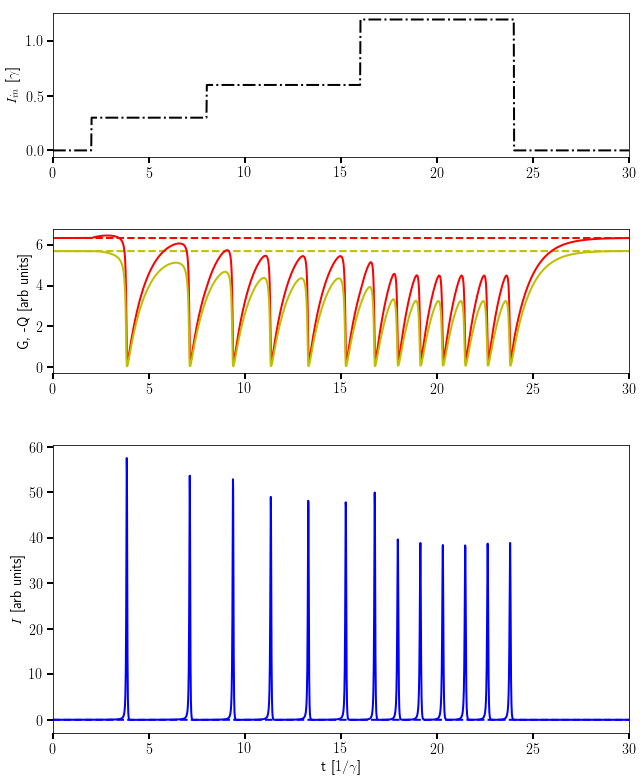

In [77]:
# study same neuron as above,
# but now drive with constant signals to see self pusling
Y1Neuronv2=neuron.Neuron(Y1params)

#create time signal
t2_end=30/Y1mpars["gamma1"]; #atleast this long
N2=int(np.ceil(t2_end/Y1Neuronv2.dt))
time2=np.linspace(0.,(N2-1)*Y1Neuronv2.dt, num=N2 )

#create steps out of heavisides
x2=np.zeros(N2)
#scale with gamma1 so drive in units of A
x2+=(0.3*Y1mpars["gamma1"])*np.heaviside(time2-2./Y1mpars["gamma1"], 0.5)
x2+=(0.3*Y1mpars["gamma1"])*np.heaviside(time2-8./Y1mpars["gamma1"], 0.5)
x2+=(0.6*Y1mpars["gamma1"])*np.heaviside(time2-16./Y1mpars["gamma1"], 0.5)
x2+=-(1.2*Y1mpars["gamma1"])*np.heaviside(time2-24./Y1mpars["gamma1"], 0.5)

#solve and estimate steady state
y1v2_out=Y1Neuronv2.solve(x2)

#plot
fig2=plt.figure(figsize=(8,10))
ax1=fig2.add_axes([0,0, 1, 0.4])
ax2=fig2.add_axes([0,0.5, 1, 0.2])
ax3=fig2.add_axes([0,.8, 1, 0.2])

# plot steady states
ax1.plot(time2, y1_steady[0]*np.ones(N2), 'b--', linewidth=2)
ax2.plot(time2, y1_steady[1]*np.ones(N2), 'r--', linewidth=2)
ax2.plot(time2, -y1_steady[2]*np.ones(N2), 'y--', linewidth=2)
# plot Neuron state and input current
ax1.plot(time2, y1v2_out[:,0], 'b-')
ax2.plot(time2, y1v2_out[:,1], 'r-')
ax2.plot(time2, -y1v2_out[:,2], 'y-')
ax3.plot(time2, x2, 'k-.')

ax1.set_xlabel('t [$1/\gamma$]')
ax1.set_ylabel('$I$ [arb units]')
ax2.set_ylabel('G, -Q [arb units]')
ax3.set_ylabel('$I_{in}$ [$\gamma$]')

ax1.set_xlim(time2[0], time2[-1])
ax2.set_xlim(time2[0], time2[-1])
ax3.set_xlim(time2[0], time2[-1])

# fig.show()
print("Demo of Yamada Neuron response to constant inputs")

Demo of Yamada Neuron response to constant inputs


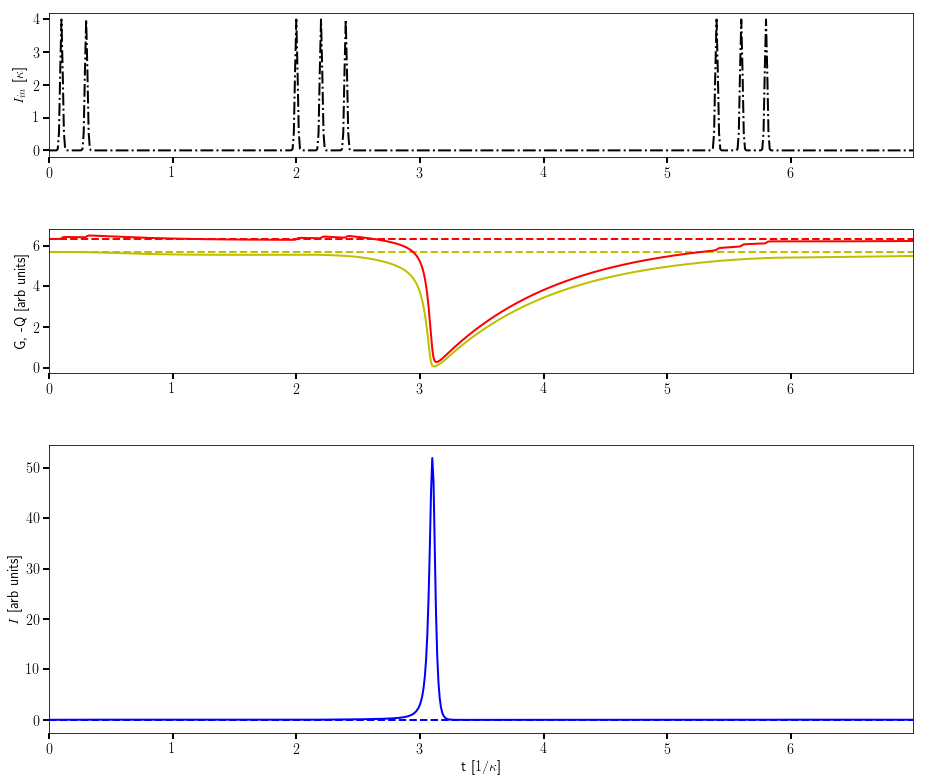

In [99]:
# study same neuron as above,
# showing ability to integrate multiple pulses
# also a demonstration of the refractory period

Y1Neuronv3=neuron.Neuron(Y1params)

#create time signal
t3_end=7/Y1mpars["gamma1"]; #atleast this long
N3=int(np.ceil(t3_end/Y1Neuronv3.dt))
time3=np.linspace(0.,(N3-1)*Y1Neuronv3.dt, num=N3 )

#create steps out of heavisides
x3=np.zeros(N3)
x3+=0.1*Gaussian_pulse(time3, 0.1/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])
x3+=0.1*Gaussian_pulse(time3, 0.3/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])

x3+=0.1*Gaussian_pulse(time3, 2./Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])
x3+=0.1*Gaussian_pulse(time3, 2.2/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])
x3+=0.1*Gaussian_pulse(time3, 2.4/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])

x3+=0.1*Gaussian_pulse(time3, 5.4/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])
x3+=0.1*Gaussian_pulse(time3, 5.6/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])
x3+=0.1*Gaussian_pulse(time3, 5.8/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])


#solve and estimate steady state
y1v3_out=Y1Neuronv3.solve(x3)

#plot
fig3=plt.figure(figsize=(12,10))
ax1=fig3.add_axes([0,0, 1, 0.4])
ax2=fig3.add_axes([0,0.5, 1, 0.2])
ax3=fig3.add_axes([0,.8, 1, 0.2])

# plot steady states
ax1.plot(time3, y1_steady[0]*np.ones(N3), 'b--', linewidth=2)
ax2.plot(time3, y1_steady[1]*np.ones(N3), 'r--', linewidth=2)
ax2.plot(time3, -y1_steady[2]*np.ones(N3), 'y--', linewidth=2)
# plot Neuron state and input current
ax1.plot(time3, y1v3_out[:,0], 'b-')
ax2.plot(time3, y1v3_out[:,1], 'r-')
ax2.plot(time3, -y1v3_out[:,2], 'y-')
ax3.plot(time3, x3, 'k-.')

ax1.set_xlabel('t [$1/\kappa$]')
ax1.set_ylabel('$I$ [arb units]')
ax2.set_ylabel('G, -Q [arb units]')
ax3.set_ylabel('$I_{in}$ [$\kappa$]')

ax1.set_xlim(time3[0], time3[-1])
ax2.set_xlim(time3[0], time3[-1])
ax3.set_xlim(time3[0], time3[-1])

# fig.show()
print("Demo of Yamada Neuron response to constant inputs")

Section 2: Dynamics of integrated laser neuron (simplified Yamada model)

Demo of Integrated Neuron Threshold behavior


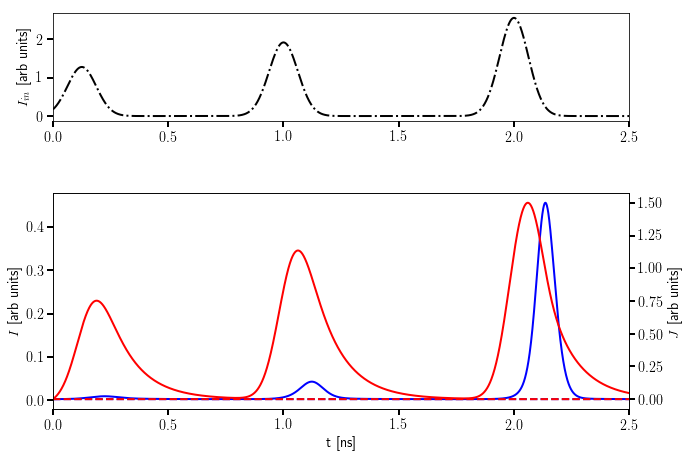

In [34]:
#Demo of integrated laser Neuron (version 0)
#again, only spikes for inputs with pulse area >threshold
# now time is in [ns], all other quantities still dimensionless

Y0mpars={"P": 0.,"gamma": 8., "kappa": 70., "beta": 2.e-1 }

y0_steady_est=[Y0mpars['beta']/Y0mpars['kappa'], Y0mpars['P'] ]
Y0params={"model" : "Yamada_0", "y0": y0_steady_est,
    "dt": 1.e-3, 'mpar': Y0mpars} #quick estimate of ss
Y0Neuronv1=neuron.Neuron(Y0params)
y0_steady=Y0Neuronv1.steady_state(y0_steady_est) #true steady state
Y0params["y0"]=y0_steady #change model parameters so that starts w this ss
Y0Neuronv1.set_initial_state(y0=y0_steady)
#create time signal, set params in terms of gamma1
t01_end=20./Y0mpars["gamma"]; #atleast this long
N01=int(np.ceil(t01_end/Y0Neuronv1.dt)) #this many points
time01=np.linspace(0.,(N01-1)*Y0Neuronv1.dt, num=N01 )


#choose gaussian input
x01=np.zeros(N01)
x01+=0.2*Gaussian_pulse(time01, 1/Y0mpars["gamma"], 5.e-1/Y0mpars["gamma"])
x01+=0.3*Gaussian_pulse(time01, 8./Y0mpars["gamma"], 5.e-1/Y0mpars["gamma"])
x01+=0.4*Gaussian_pulse(time01, 16./Y0mpars["gamma"], 5.e-1/Y0mpars["gamma"])
x01=Y0mpars["gamma"]*(1-Y0mpars["P"])*x01 #put in units of difference to threshold
#solve and estimate steady state
y0v1_out=Y0Neuronv1.solve(x01)




#plot
fig01=plt.figure(figsize=(8,5))
ax1=fig01.add_axes([0,0, 1, 0.6])
ax2=ax1.twinx()
ax3=fig01.add_axes([0,.8, 1, 0.3])

# plot steady states
ax1.plot(time01, y0_steady[0]*np.ones(N01), 'b--', linewidth=2)
ax2.plot(time01, y0_steady[1]*np.ones(N01), 'r--', linewidth=2)
# plot Neuron state and input current
ax1.plot(time01, y0v1_out[:,0], 'b-')
ax2.plot(time01, y0v1_out[:,1], 'r-')
ax3.plot(time01, x01/Y0mpars["gamma"], 'k-.')

ax1.set_xlabel('t [ns]')
ax1.set_ylabel('$I$ [arb units]')
ax2.set_ylabel('$J$ [arb units]')
ax3.set_ylabel('$I_{in}$ [arb units]')

ax1.set_xlim(time01[0], time01[-1])
ax3.set_xlim(time01[0], time01[-1])

print("Demo of integrated neuron threshold behavior")

Demo of Integrated Neuron Threshold behavior


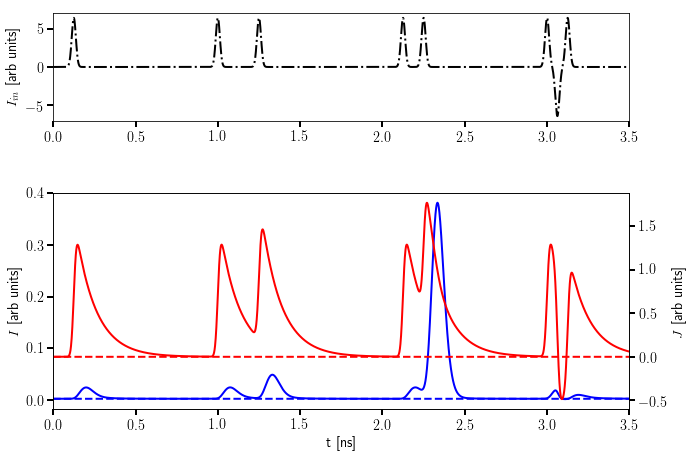

In [48]:
#Same integrated Neuron, showing Cooincidence detection

Y0Neuronv2=neuron.Neuron(Y0params)
#create time signal, set params in terms of gamma1
t02_end=28./Y0mpars["gamma"]; #atleast this long
N02=int(np.ceil(t02_end/Y0Neuronv2.dt)) #this many points
time02=np.linspace(0.,(N02-1)*Y0Neuronv2.dt, num=N02 )


#choose gaussian input
x02=np.zeros(N02)
x02+=0.2*Gaussian_pulse(time02, 1/Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 8./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 10./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 17./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 18./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 24./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=-0.2*Gaussian_pulse(time02, 24.5/Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 25./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02=Y0mpars["gamma"]*(1-Y0mpars["P"])*x02 #put in units of difference to threshold
#solve and estimate steady state
y0v2_out=Y0Neuronv2.solve(x02)f




#plot
fig02=plt.figure(figsize=(8,5))
ax1=fig02.add_axes([0,0, 1, 0.6])
ax2=ax1.twinx()
ax3=fig02.add_axes([0,.8, 1, 0.3])

# plot steady states
ax1.plot(time02, y0_steady[0]*np.ones(N02), 'b--', linewidth=2)
ax2.plot(time02, y0_steady[1]*np.ones(N02), 'r--', linewidth=2)
# plot Neuron state and input current
ax1.plot(time02, y0v2_out[:,0], 'b-')
ax2.plot(time02, y0v2_out[:,1], 'r-')
ax3.plot(time02, x02/Y0mpars["gamma"], 'k-.')

ax1.set_xlabel('t [ns]')
ax1.set_ylabel('$I$ [arb units]')
ax2.set_ylabel('$J$ [arb units]')
ax3.set_ylabel('$I_{in}$ [arb units]')

ax1.set_xlim(time02[0], time02[-1])
ax3.set_xlim(time02[0], time02[-1])

print("Demo of Integrated Neuron Threshold behavior")